## Лабораторная работа №6
**Безусловный экстремум **

**Выполнила:** Клюшенкова Полина Анатольевна: 429


** Цель работы: **
научиться находить экстремум функций

Построим график функции $$f(x_1,x_2)=0.5x_1x_2+(47*x_1-x_2)(\frac{x_1}{3}+\frac{x_2}{4})$$ на интересующей нас области

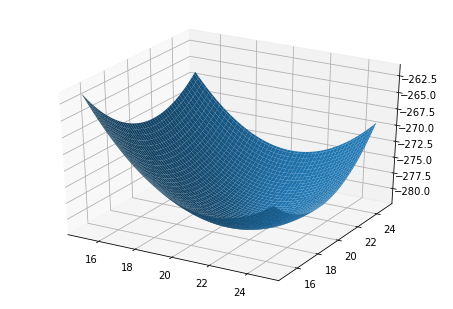

In [74]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy

def makeData ():
    x = numpy.arange (15, 25, 0.1)
    y = numpy.arange (15, 25, 0.1)
    xgrid, ygrid = numpy.meshgrid(x, y)

    zgrid =- (0.5*xgrid*ygrid+(47-xgrid-ygrid)*(xgrid/3+ygrid/4))
    return xgrid, ygrid, zgrid

x, y, z = makeData()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, z)

pylab.show()

In [75]:
from sympy import diff, symbols, cos, sin
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import copy

Для поиска минимума будем использовать метод покоординатного спуска
$$x^{k+1}=x^k+{\alpha}_k{p^k},$$ где 
$$p^k = e_{k-[k/n]n+1},$$ где
$$e_j={0,0....0,1,0...0},$$ где 1 стоит на j-ом месте
$$f(x^k+{\alpha}_k{p^k}) = min_{-{\infty}< \alpha < +{\infty}} f(x^k+ \alpha p^k),$$

для одномерной минимизации будем использовать метод золотого сечения:
$$\tau = 2^{-1}(1+\sqrt{5}) \simeq 1.6118$$   
$$x_1=b-(b-a)/\tau$$
$$x_2=a+(b-a)/\tau$$

In [1]:
import numpy as np

xk = 18
yk = 22
n=2
Xk=np.zeros(n)
Xk1=np.zeros(n)
Xk[0]=19;
Xk[1]=18;
xgr = []
ygr =[]
xgr.append(Xk[0])
ygr.append(Xk[1])
k = 0
delta = 0.7
eps = 0.01
def f(x1):
    x = x1[0]
    y = x1[1]
    return  -(0.5*x*y+(47-x-y)*(x/3+y/4))
tau = 1.6118
while(abs(f(Xk)-f(Xk1))>eps):    
    p = np.zeros(n)
    p[k-(k//n)*n] = 1
    a=0
    b=5
    while((b-a)>delta):
        x1 = b-(b-a)/tau
        x2 = a+(b-a)/tau
        if(f(Xk+x1*p)<f(Xk+x2*p)):
            b=x2
        if(f(Xk+x1*p)>f(Xk+x2*p)):
            a =x1
        if(f(Xk+x1*p)==f(Xk+x2*p)):
            a=x1
            b=x2
    alfa = (b-a)/2
    Xk1 = Xk
    Xk = Xk+alfa*p
    xgr.append(Xk[0])
    ygr.append(Xk[1])
    k+=1
w=Xk
print(Xk, f(Xk), 'iter: ', k)

[21.068363 20.068363] -281.99688433320233 iter:  18


Построим линии уровня и направление приблежения метода:

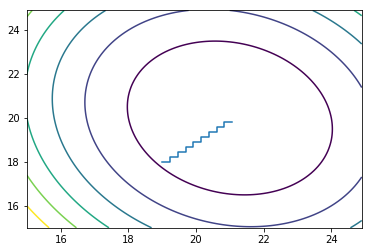

In [77]:
import pylab
pylab.contour(x, y, z)
def makeData2():
    xg = np.zeros((k))
    yg = np.zeros((k))
    zg = np.zeros((k))
    for i in range (k):
        xg[i] = xgr[i]
        yg[i] = ygr[i]
        d = np.zeros((2))
        d[0] = xgr[i]
        d[1] = ygr[i]
        zg = f(d)
    return xg, yg, zg
xg = np.zeros((k))
yg = np.zeros((k))
zg = np.zeros((k))
xg, yg, zg = makeData2()    

pylab.plot(xg,yg)
pylab.show()

Оценим овражность. Для этого найдем собственные числа $$\lambda_1$$ и $$\lambda_2$$ матрицы $$\bigtriangledown^2f(x^k)$$
коэффициент овражности:
$$\theta = \frac{\lambda_1}{\lambda_2}$$

In [81]:
def nabla2(x):
    N = np.zeros((2, 2))
    N[0][0] = 2/3
    N[0][1] = -7/12
    N[1][0] = -7/12
    N[1][1] = -1/2
    return N
matrix = nabla2(w)
s, v = np.linalg.eig (matrix)
print (s, "\n", v)
q = s[0]/s[1]
print('obr = ', q)

[ 0.90829124 -0.74162458] 
 [[ 0.92387953  0.38268343]
 [-0.38268343  0.92387953]]
obr =  -1.22473185436
